Can we have a high and (statistically) significant value of $r^2$ but an insignificant OLS linear regression slope?

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss

In [2]:
plt.style.use('ggplot')
%matplotlib notebook

<IPython.core.display.Javascript object>


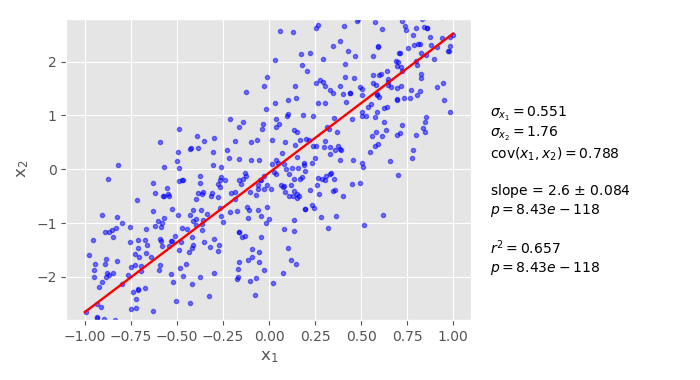

In [233]:
np.random.seed(seed=110290)  # seed for reproducibility

N = 500

#sigma_x1 = 2
sigma_x2 = 1.0  # standard deviation of X2 before adding the dependence on X1
slope_x2 = 2.5  # 

x1 = np.random.uniform(-1, 1, N)  # could just use linspace really. but if not need to sort to establish the relationship
x1 = np.sort(x1)
x2 = np.linspace(-1, 1, N)*slope_x2 + np.random.normal(loc=0, scale=sigma_x2, size=N)
#x2 = np.sort(x2)

f1, a = plt.subplots(figsize=(7, 3.8))
a.plot(x1, x2, 'b.', alpha=0.5)

slope, intercept, r_lr, p_slope, se_slope = ss.linregress(x1, x2)
xplot = np.array([-1, 1])
a.plot(xplot, xplot*slope+intercept, 'r-', lw=1.7)

r, p_r = ss.pearsonr(x1, x2)
assert(np.isclose(r, r_lr))
assert( p_slope != p_r and np.isclose(p_r, p_slope) )  # not exactly equal, but it seems they should be

a.set_xlabel('x$_1$')
a.set_ylabel('x$_2$')
a.set_ylim(-2.8, 2.8)

s = '''
$\sigma_{{x_1}}={s_x1:.3g}$
$\sigma_{{x_2}}={s_x2:.3g}$
$\mathrm{{cov}}(x_1,x_2)={cov:.3g}$

slope = {slope:.2g} $\pm$ {se_slope:.2g}
$p={p_slope:.3g}$

$r^2={rsqd:.3g}$
$p={p_r:.3g}$
'''.format(s_x1=x1.std(), s_x2=x2.std(), cov=np.cov(x1, x2)[0,1],
           slope=slope, se_slope=se_slope, p_slope=p_slope,
           rsqd=r**2, p_r=p_r).strip()

f1.text(0.7, 0.5, s,
        va='center', ha='left')

f1.tight_layout(rect=(0, 0, 0.7, 1.0));

We note that
$$
\rho_{X, Y} = \mathrm{corr}(X, Y) = \frac{\mathrm{cov}(X, Y)}{\sigma_X \sigma_Y}
$$
For a sample, Pearson $\rho$ becomes Pearson $r$
$$
r = r_{x y} = \frac{\mathrm{cov}(x, y)}{s_x s_y} = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}
{\sqrt{\sum_{i=1}^n (x_i - \bar{x})^2} \sqrt{\sum_{i=1}^n (y_i - \bar{y})^2}}
$$
For simple linear regression (one independent and one dependent variable), the slope from the OLS solution is given by
$$
\hat{\beta} = \frac{\mathrm{cov}(x, y)}{s_x^2} 
$$
The standard error of the slope is
$$
s_{\hat{\beta}} = \frac{\sqrt{ \frac{1}{n-2} \sum_{i=1}^n (y_i - \hat{y_i})^2}}{\sqrt{\sum_{i=1}^n (x_i - \bar{x})^2}}
$$
where $\hat{y_i} = x_i \hat{\beta} + \hat{\alpha}$, where $\alpha = \bar{y} - \hat{\beta} \bar{x}$ is the intercept.

From these, we can see from the above that the slope $\hat{\beta}$ is equivalent to
$$
r_{x y} \frac{s_y}{s_x}
$$
This result, $\hat{\beta} = r_{x y} \frac{s_y}{s_x}$, implies that $r_{x y}$ is the slope of the regression for the standardized data (with $s = 1$). 

### Test statistics
Both follow Student's $t$-distribution with df $= n-2$.

For Pearson $r$, testing the null hypothesis of no correlation, or more specifically, that the true correlation coefficient $\rho$ is equal to 0, based on the value of the sample correlation coefficient $r$
[ref](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient#Testing_using_Student's_t-distribution)
$$
t = r \sqrt{\frac{n-2}{1-r^2}}
$$

For the OLS slope, testing the null hypothesis that the slope is equal to 0 
$$
t = \frac{\hat{\beta}}{s_{\hat{\beta}}}
$$
Using the formulae above, we should be able to show that the two are equivalent. Though personally I haven't been able to...

In [186]:
#> by computing the test statistics, we can confirm this
ts = r*np.sqrt((N-2)/(1-r**2))  # test statistic for Pearson r
print('t={:.17f}, p={:.17f}'.format(ts, 1 - ss.t.cdf(ts, 2)))

ts = slope/se_slope  # for testing slope != 0
print('t={:.17f}, p={:.17f}'.format(ts, 1 - ss.t.cdf(ts, 2)))

t=1.46351851551434087, p=0.14044185470011517
t=1.46351851551434109, p=0.14044185470011517
